# CCLAMP Network: Centrality Measures

In [1]:
# Import packages
import pandas as pd
import networkx as nx
from pyvis.network import Network
import community.community_louvain as community_louvain

In [2]:
# Read the network
network = pd.read_csv("CCLAMP_Network.txt", sep="\t", encoding='utf-8')
network.head(10)

,Target,Source,Weight
0,Henk Kuitenbrouwer,Henri Bruning,12
1,Albert Kuyle,Henk Kuitenbrouwer,31
2,Albe,Henk Kuitenbrouwer,25
3,Dirk Coster,Henk Kuitenbrouwer,10
4,Dirk Coster,Jan Engelman,14
5,Albe,Jan Engelman,27
6,Gerard Bruning,Jan Engelman,10
7,Jan Engelman,Joep Nicolas,10
8,Albert Kuyle,Jan Engelman,21
9,Albe,Albert Kuyle,48


In [3]:
# Create a weighted graph
G = nx.from_pandas_edgelist(network, 
                            source = 'Source', 
                            target = 'Target', 
                            edge_attr = 'Weight',
                            create_using = nx.Graph())
print(G)

Graph with 817 nodes and 1988 edges


In [4]:
net = Network(notebook = True, width="1000px", height="700px", bgcolor="#222222", font_color="white")

node_degree = dict(G.degree)
      
# setting up node attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show('CCLAMP.html')

CCLAMP.html


# Make Centrality Measures

<Axes: >

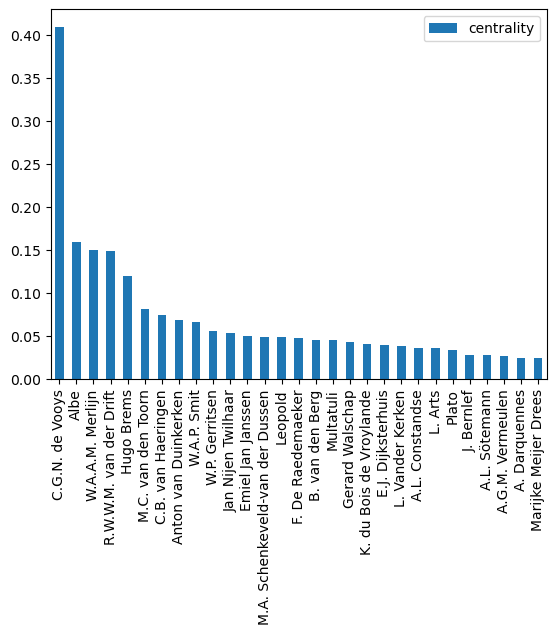

In [4]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 30 nodes
degree_df.sort_values('centrality', ascending=False)[0:29].plot(kind="bar")

<Axes: >

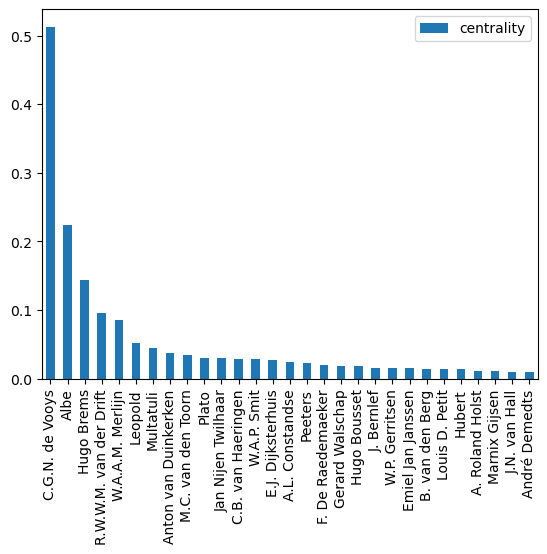

In [5]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 30 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:29].plot(kind="bar")

<Axes: >

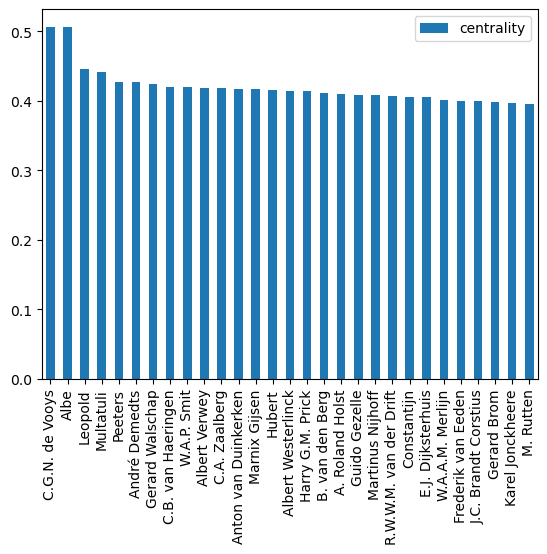

In [6]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 30 nodes
closeness_df.sort_values('centrality', ascending=False)[0:29].plot(kind="bar")

<Axes: >

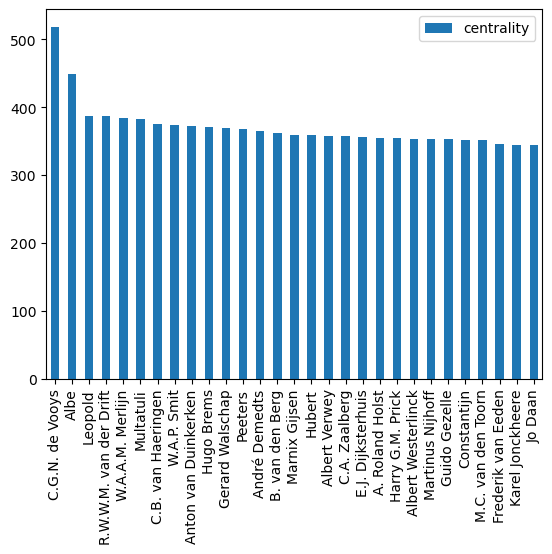

In [7]:
# Harmonic centrality
harmonic_dict = nx.harmonic_centrality(G)
harmonic_df = pd.DataFrame.from_dict(harmonic_dict, orient='index', columns=['centrality'])
# Plot top 30 nodes
harmonic_df.sort_values('centrality', ascending=False)[0:29].plot(kind="bar")

In [8]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')
nx.set_node_attributes(G, harmonic_dict, 'harmonic_centrality')

In [9]:
harmonic_df = pd.DataFrame.from_dict(harmonic_dict, orient='index')
harmonic_df.head(10)

,0
J.C. Bloem,337.233333
P.J. Blok,236.483333
C.R. de Klerk,302.166667
Allard Pierson,304.300000
Montanus,297.500000
Marcel Coole,243.300000
L.C. Michels,306.416667
H.E.H. van Loon,212.916667
Willem Richard Boer,280.000000
Abram de Swaan,1.833333


In [ ]:
harmonic_df.to_csv("CCLAMP_Network_Harmonic_Centrality.txt", index=True, sep='\t', encoding='utf-8')